In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqs, bilinear, freqz

In [51]:
# Analoger Biquad Filter
# Bilinear Transformation basierend auf dem Experiment 4 der
# Biquad Schaltung aus Analog System Lab Kit PRO

R = 1000
C = 100e-9
w0 = 1 / (R * C)
Q = 4.7
fs = 44100

# Nenner
dens = [1, w0/Q, w0**2]
# Tiefpass Zähler
TP_nums = [0, 0, w0**2]
ws_TP, Hs_TP = freqs(TP_nums, dens, worN = 512)
# Hochpass Zähler
HP_nums = [1, 0, 0]
ws_HP, Hs_HP = freqs(HP_nums, dens, worN = 512)
# Bandpass Zähler
BP_nums =  [0, -w0, 0]
ws_BP, Hs_BP = freqs(BP_nums, dens, worN = 512)
# Bandstop Zähler
BS_nums = [1, 0, w0**2]
ws_BS, Hs_BS = freqs(BS_nums, dens, worN = 512)

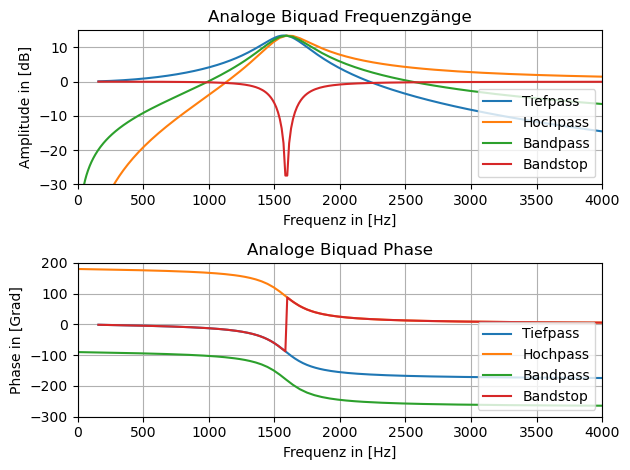

In [53]:
# Plots der analogen Filter
plt.figure(1)
# Plot des analogen Frequenzgangs
plt.subplot(2, 1, 1)
plt.plot(ws_TP/(2*np.pi), 20*np.log10(abs(Hs_TP)), label = 'Tiefpass')
plt.plot(ws_HP/(2*np.pi), 20*np.log10(abs(Hs_HP)), label = 'Hochpass')
plt.plot(ws_BP/(2*np.pi), 20*np.log10(abs(Hs_BP)), label = 'Bandpass')
plt.plot(ws_BS/(2*np.pi), 20*np.log10(abs(Hs_BS)), label = 'Bandstop')
plt.grid(True)
plt.title('Analoge Biquad Frequenzgänge')
plt.xlabel('Frequenz in [Hz]')
plt.ylabel('Amplitude in [dB]')
plt.xlim([0, 4000])
plt.ylim([-30, 15])
plt.legend(loc='lower right')

# Plot der analogen Phase
plt.subplot(2, 1, 2)
plt.plot(ws_TP/(2*np.pi), np.unwrap(np.angle(Hs_TP))*(180/np.pi), label = 'Tiefpass')
plt.plot(ws_HP/(2*np.pi), np.unwrap(np.angle(Hs_HP))*(180/np.pi), label = 'Hochpass')
plt.plot(ws_BP/(2*np.pi), np.unwrap(np.angle(Hs_BP))*(180/np.pi), label = 'Bandpass')
plt.plot(ws_BS/(2*np.pi), np.unwrap(np.angle(Hs_BS))*(180/np.pi), label = 'Bandstop')
plt.grid(True)
plt.title('Analoge Biquad Phase')
plt.xlabel('Frequenz in [Hz]')
plt.ylabel('Phase in [Grad]')
plt.xlim([0, 4000])
plt.ylim([-300, 200])
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [55]:
# Bilineartransformation

# Tiefpass
TP_numz, TP_denz = bilinear(TP_nums, dens, fs = fs)
wz_TP, Hz_TP = freqz(TP_numz, TP_denz, worN = 512, fs = fs)
# Hochpass
HP_numz, HP_denz = bilinear(HP_nums, dens, fs = fs)
wz_HP, Hz_HP = freqz(HP_numz, HP_denz, worN = 512, fs = fs)
# Bandpass
BP_numz, BP_denz = bilinear(BP_nums, dens, fs = fs)
wz_BP, Hz_BP = freqz(BP_numz, BP_denz, worN = 512, fs = fs)
# Bandstop
BS_numz, BS_denz = bilinear(BS_nums, dens, fs = fs)
wz_BS, Hz_BS = freqz(BS_numz, BS_denz, worN = 512, fs = fs)

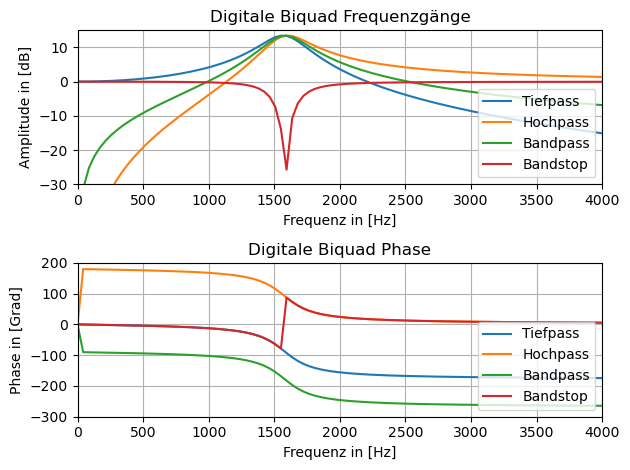

In [57]:
# Plot der digitalen Filter
plt.figure(2)
# Plot des digitalen Frequenzgangs
plt.subplot(2, 1, 1)
plt.plot(wz_TP, 20*np.log10(abs(Hz_TP)), label = 'Tiefpass')
plt.plot(wz_HP, 20*np.log10(np.maximum(abs(Hz_HP), 1e-10)), label = 'Hochpass')
plt.plot(wz_BP, 20*np.log10(np.maximum(abs(Hz_BP), 1e-10)), label = 'Bandpass')
plt.plot(wz_BS, 20*np.log10(abs(Hz_BS)), label = 'Bandstop')
plt.grid(True)
plt.title('Digitale Biquad Frequenzgänge')
plt.xlabel('Frequenz in [Hz]')
plt.ylabel('Amplitude in [dB]')
plt.xlim([0, 4000])
plt.ylim([-30, 15])
plt.legend(loc='lower right')

# Plot der digitalen Phase
plt.subplot(2, 1, 2)
plt.plot(wz_TP, np.unwrap(np.angle(Hz_TP))*(180/np.pi), label = 'Tiefpass')
plt.plot(wz_HP, np.unwrap(np.angle(Hz_HP))*(180/np.pi), label = 'Hochpass')
plt.plot(wz_BP, np.unwrap(np.angle(Hz_BP))*(180/np.pi), label = 'Bandpass')
plt.plot(wz_BS, np.unwrap(np.angle(Hz_BS))*(180/np.pi), label = 'Bandstop')
plt.grid(True)
plt.title('Digitale Biquad Phase')
plt.xlabel('Frequenz in [Hz]')
plt.ylabel('Phase in [Grad]')
plt.xlim([0, 4000])
plt.ylim([-300, 200])
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

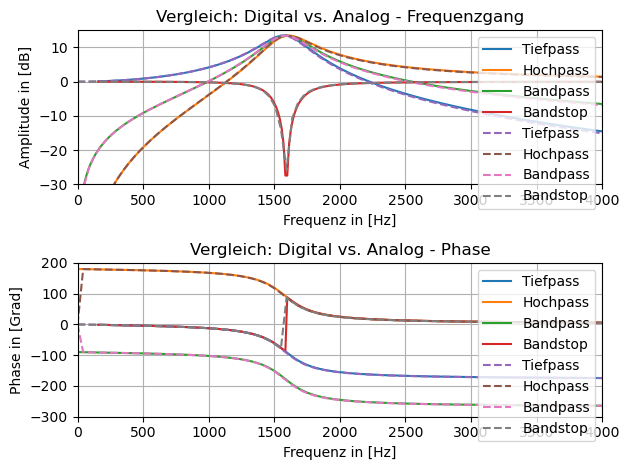

In [59]:
# Vergleich analog vs digital
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(ws_TP/(2*np.pi), 20*np.log10(abs(Hs_TP)), label = 'Tiefpass')
plt.plot(ws_HP/(2*np.pi), 20*np.log10(abs(Hs_HP)), label = 'Hochpass')
plt.plot(ws_BP/(2*np.pi), 20*np.log10(abs(Hs_BP)), label = 'Bandpass')
plt.plot(ws_BS/(2*np.pi), 20*np.log10(abs(Hs_BS)), label = 'Bandstop')
plt.plot(wz_TP, 20*np.log10(abs(Hz_TP)), '--', label = 'Tiefpass')
plt.plot(wz_HP, 20*np.log10(np.maximum(abs(Hz_HP), 1e-10)), '--', label = 'Hochpass')
plt.plot(wz_BP, 20*np.log10(np.maximum(abs(Hz_BP), 1e-10)), '--', label = 'Bandpass')
plt.plot(wz_BS, 20*np.log10(abs(Hz_BS)), '--', label = 'Bandstop')
plt.grid(True)
plt.title('Vergleich: Digital vs. Analog - Frequenzgang')
plt.xlabel('Frequenz in [Hz]')
plt.ylabel('Amplitude in [dB]')
plt.xlim([0, 4000])
plt.ylim([-30, 15])
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(ws_TP/(2*np.pi), np.unwrap(np.angle(Hs_TP))*(180/np.pi), label = 'Tiefpass')
plt.plot(ws_HP/(2*np.pi), np.unwrap(np.angle(Hs_HP))*(180/np.pi), label = 'Hochpass')
plt.plot(ws_BP/(2*np.pi), np.unwrap(np.angle(Hs_BP))*(180/np.pi), label = 'Bandpass')
plt.plot(ws_BS/(2*np.pi), np.unwrap(np.angle(Hs_BS))*(180/np.pi), label = 'Bandstop')
plt.plot(wz_TP, np.unwrap(np.angle(Hz_TP))*(180/np.pi), '--', label = 'Tiefpass')
plt.plot(wz_HP, np.unwrap(np.angle(Hz_HP))*(180/np.pi), '--', label = 'Hochpass')
plt.plot(wz_BP, np.unwrap(np.angle(Hz_BP))*(180/np.pi), '--', label = 'Bandpass')
plt.plot(wz_BS, np.unwrap(np.angle(Hz_BS))*(180/np.pi), '--', label = 'Bandstop')
plt.grid(True)
plt.title('Vergleich: Digital vs. Analog - Phase')
plt.xlabel('Frequenz in [Hz]')
plt.ylabel('Phase in [Grad]')
plt.xlim([0, 4000])
plt.ylim([-300, 200])
plt.legend()
plt.tight_layout()
plt.show()

In [61]:
# Filterkoeffizienten ausgeben
def print_coefficients(name, num, den):
    print(f'\nKoeffizienten {name}:')
    print('Zähler:', np.round(num, 7))
    print('Nenner:', np.round(den, 7))

print_coefficients('Digitaler Tiefpass', TP_numz, TP_denz)
print_coefficients('Digitaler Hochpass', HP_numz, HP_denz)
print_coefficients('Digitaler Bandpass', BP_numz, BP_denz)
print_coefficients('Digitaler Bandstop', BS_numz, BS_denz)


Koeffizienten Digitaler Tiefpass:
Zähler: [0.0123963 0.0247927 0.0123963]
Nenner: [ 1.        -1.9038888  0.9534742]

Koeffizienten Digitaler Hochpass:
Zähler: [ 0.9643408 -1.9286815  0.9643408]
Nenner: [ 1.        -1.9038888  0.9534742]

Koeffizienten Digitaler Bandpass:
Zähler: [-0.1093357  0.         0.1093357]
Nenner: [ 1.        -1.9038888  0.9534742]

Koeffizienten Digitaler Bandstop:
Zähler: [ 0.9767371 -1.9038888  0.9767371]
Nenner: [ 1.        -1.9038888  0.9534742]
